<a href="https://colab.research.google.com/github/Salwarshaik18/Ostoporosis/blob/main/osteoporosis_r_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Select kaggle.json from your computer


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hemaandaluri9848","key":"c9601081c2680bb9d8aed00e65532a1e"}'}

In [ ]:
#Move the kaggle.json file to the correct location:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions


In [ ]:
!kaggle datasets download -d stevepython/osteoporosis-knee-xray-dataset --unzip


Dataset URL: https://www.kaggle.com/datasets/stevepython/osteoporosis-knee-xray-dataset
License(s): unknown


In [ ]:

import os
import shutil

# Define the paths
base_dir = "/content"
normal_path = os.path.join(base_dir, "normal/normal")  # Incorrect path
osteoporosis_path = os.path.join(base_dir, "osteoporosis/osteoporosis")  # Incorrect path

# Corrected paths
correct_normal_path = os.path.join(base_dir, "train/normal")
correct_osteoporosis_path = os.path.join(base_dir, "train/osteoporosis")

# Create correct folders
os.makedirs(correct_normal_path, exist_ok=True)
os.makedirs(correct_osteoporosis_path, exist_ok=True)

# Move all images from the incorrect folders to the correct location
for img in os.listdir(normal_path):
    shutil.move(os.path.join(normal_path, img), correct_normal_path)

for img in os.listdir(osteoporosis_path):
    shutil.move(os.path.join(osteoporosis_path, img), correct_osteoporosis_path)

# Remove the empty old folders
shutil.rmtree(os.path.join(base_dir, "normal"))
shutil.rmtree(os.path.join(base_dir, "osteoporosis"))

print("✅ Dataset folder structure fixed successfully!")


✅ Dataset folder structure fixed successfully!


In [ ]:
print("Normal images:", len(os.listdir("/content/train/normal")))
print("Osteoporosis images:", len(os.listdir("/content/train/osteoporosis")))


Normal images: 186
Osteoporosis images: 186


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
# Define paths
train_dir = "/content/train"

# Data augmentation & normalization
datagen = ImageDataGenerator(
    rescale=1.0/255,        # Normalize pixel values (0-1)
    rotation_range=20,      # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2, # Vertical shift
    shear_range=0.2,        # Shearing
    zoom_range=0.2,         # Zoom
    horizontal_flip=True,   # Flip images
    validation_split=0.2    # Splitting into train & validation
)

# Load Training Set
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Binary classification (normal vs osteoporosis)
    subset='training'
)

# Load Validation Set
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Check class mapping
print("Class indices:", train_generator.class_indices)


Found 298 images belonging to 2 classes.
Found 74 images belonging to 2 classes.
Class indices: {'normal': 0, 'osteoporosis': 1}


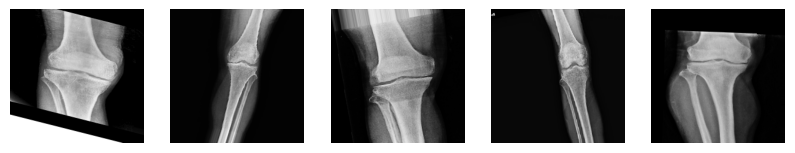

In [ ]:
# Get a batch of images
images, labels = next(train_generator)

# Plot first 5 images
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
#Define the CNN Architecture

#Use Conv2D layers to detect features in images.
#Use MaxPooling2D to reduce image size.
#Add Dropout to prevent overfitting.
#Use a Dense (fully connected) layer for classification.

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Define Training Parameters


#Number of epochs (how many times the model sees the entire dataset)
#Batch size (how many images are processed at once)
epochs = 10
batch_size = 32



In [ ]:
#Now, train the model using the fit() function.
#accuracy → How well the model is learning (aim for above 80% after several epochs).
#val_accuracy → How well the model performs on validation data.
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    batch_size=batch_size
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.5722 - loss: 0.7019 - val_accuracy: 0.3919 - val_loss: 0.7343
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.4604 - loss: 0.7017 - val_accuracy: 0.5135 - val_loss: 0.7051
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.5451 - loss: 0.6806 - val_accuracy: 0.5676 - val_loss: 0.6888
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.6313 - loss: 0.6751 - val_accuracy: 0.5676 - val_loss: 0.6884
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.5947 - loss: 0.6764 - val_accuracy: 0.5811 - val_loss: 0.6808
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.6178 - loss: 0.6635 - val_accuracy: 0.5676 - val_loss: 0.6682
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.6076 - loss: 0.6683 - val_accuracy: 0.6216 - val_loss: 0.6931
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 5s/step - accuracy: 0.6477 - loss: 0.6561 - val_accuracy: 0.5135 - val_loss:

In [ ]:
epochs = 30  # Increase the epochs
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    batch_size=batch_size
)


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.6882 - loss: 0.6166 - val_accuracy: 0.5676 - val_loss: 0.6579
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - accuracy: 0.6042 - loss: 0.6471 - val_accuracy: 0.6081 - val_loss: 0.6583
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.6948 - loss: 0.6191 - val_accuracy: 0.5946 - val_loss: 0.6779
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.6894 - loss: 0.5945 - val_accuracy: 0.6486 - val_loss: 0.6540
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.6984 - loss: 0.5830 - val_accuracy: 0.6892 - val_loss: 0.6317
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 55s 6s/step - accuracy: 0.6870 - loss: 0.6111 - val_accuracy: 0.6351 - val_loss: 0.6435
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.6266 - loss: 0.6464 - val_accuracy: 0.6892 - val_loss: 0.5961
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.6768 - loss: 0.5799 - val_accuracy: 0.5946 - val_loss:

In [ ]:
#Problem: If the model is too basic, it might not capture complex patterns in X-rays.
#Solution: Add more layers and filters.
#Added more convolutional layers to capture finer details.
#Dropout (0.5) to reduce overfitting.

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Prevents overfitting
    Dense(1, activation='sigmoid')
])


In [ ]:
#Data Augmentation
#Problem: The dataset might not be diverse enough.
#Solution: Use data augmentation to artificially expand the dataset.

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Rotate images up to 30 degrees
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
#Change Optimizer & Learning Rate
#Problem: The model might be stuck in a bad learning path.
#Solution: Try Adam optimizer with a smaller learning rate.
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)


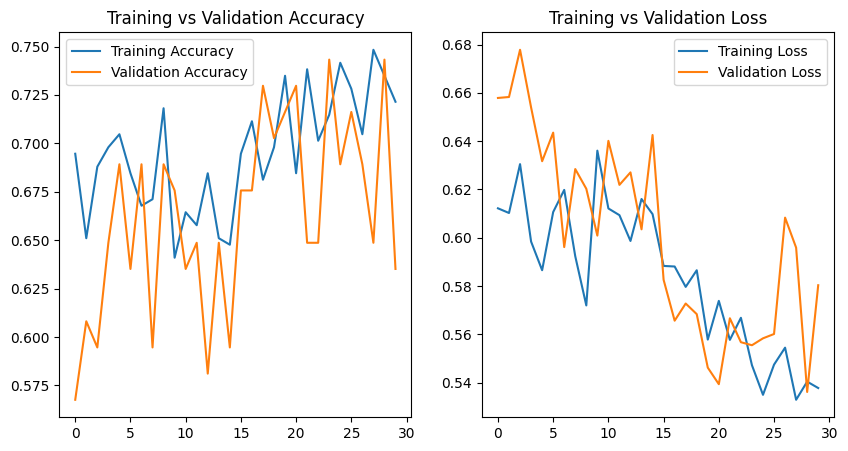

In [ ]:
#To visualize how accuracy improved, plot training vs. validation accuracy:
import matplotlib.pyplot as plt

# Get accuracy and loss history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")

# Plot Loss
plt.subplot(1,2,2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()


In [ ]:
#Analysis of Training & Validation Graphs
#From your plots:

#Left Graph (Accuracy):

#Training accuracy gradually increases and reaches ~75%.
#Validation accuracy fluctuates a lot but reaches a similar level (~74%).
#No extreme overfitting (since both lines are close), but there is high variance (instability).
#Right Graph (Loss):

#Loss is fluctuating a lot (both training and validation).
#Ideally, validation loss should gradually decrease, but here it spikes.
#⚠ Issues Observed
#High Variance / Unstable Training → Model is not learning consistently.
#Validation Loss Fluctuation → Possible overfitting or bad learning rate.


In [ ]:
#Reduce Learning Rate
#Try reducing the learning rate (e.g., 0.001 → 0.0005 or 0.0001).
#This helps in smoother convergence and reduces fluctuations.
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0005),  # Reduce learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
#Data Augmentation (More Variety in Training)
#If not used, add augmentation to reduce overfitting and stabilize learning.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
#ResNet50 & VGG16 for Knee X-ray Classification
#Since CNN gave 75% accuracy, let's try Transfer Learning using ResNet50 & VGG16.
#These pre-trained models will improve accuracy by leveraging learned features.


#Install Required Libraries (If Not Installed)
!pip install tensorflow keras numpy matplotlib


In [ ]:
#Load Required Libraries

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
#Define Data Generators
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    "train/",  # Your dataset folder
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    "train/",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset="validation"
)


Found 298 images belonging to 2 classes.
Found 74 images belonging to 2 classes.


In [ ]:
#Model - ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze Pre-trained Layers
for layer in base_model.layers:
    layer.trainable = False

# Add Custom Layers on Top
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model_resnet = Model(inputs=base_model.input, outputs=x)

# Compile Model
model_resnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Train Model
history_resnet = model_resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 105s 9s/step - accuracy: 0.4470 - loss: 2.9705 - val_accuracy: 0.5000 - val_loss: 0.9570
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 135s 9s/step - accuracy: 0.5520 - loss: 0.9214 - val_accuracy: 0.5000 - val_loss: 0.7380
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 79s 8s/step - accuracy: 0.6083 - loss: 0.7889 - val_accuracy: 0.8108 - val_loss: 0.5134
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 78s 8s/step - accuracy: 0.6883 - loss: 0.6071 - val_accuracy: 0.7973 - val_loss: 0.4949
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 77s 8s/step - accuracy: 0.7098 - loss: 0.5489 - val_accuracy: 0.7973 - val_loss: 0.4967
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 86s 9s/step - accuracy: 0.7227 - loss: 0.5683 - val_accuracy: 0.7973 - val_loss: 0.4980
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 86s 8s/step - accuracy: 0.6765 - loss: 0.5732 - val_accuracy: 0.7838 - val_loss: 0.5274
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 78s 8s/step - accuracy: 0.7

In [ ]:
#Model - VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze Pre-trained Layers
for layer in base_model.layers:
    layer.trainable = False

# Add Custom Layers on Top
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model_vgg = Model(inputs=base_model.input, outputs=x)

# Compile Model
model_vgg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train Model
history_vgg = model_vgg.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 214s 21s/step - accuracy: 0.6124 - loss: 0.6784 - val_accuracy: 0.8378 - val_loss: 0.4555
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 207s 21s/step - accuracy: 0.7497 - loss: 0.5170 - val_accuracy: 0.8378 - val_loss: 0.4571
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 209s 21s/step - accuracy: 0.7605 - loss: 0.4992 - val_accuracy: 0.8378 - val_loss: 0.4346
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 207s 22s/step - accuracy: 0.8122 - loss: 0.4159 - val_accuracy: 0.8514 - val_loss: 0.4233
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 210s 21s/step - accuracy: 0.7655 - loss: 0.4446 - val_accuracy: 0.7973 - val_loss: 0.4797
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 208s 21s/step - accuracy: 0.7869 - loss: 0.4791 - val_accuracy: 0.8378 - val_loss: 0.4540
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 208s 21s/step - accuracy: 0.7847 - loss: 0.4737 - val_accuracy: 0.6081 - val_loss: 0.6834
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 252s 26s/step - accuracy: 0.7419 - loss: 0.4552 - val_accuracy: 0.

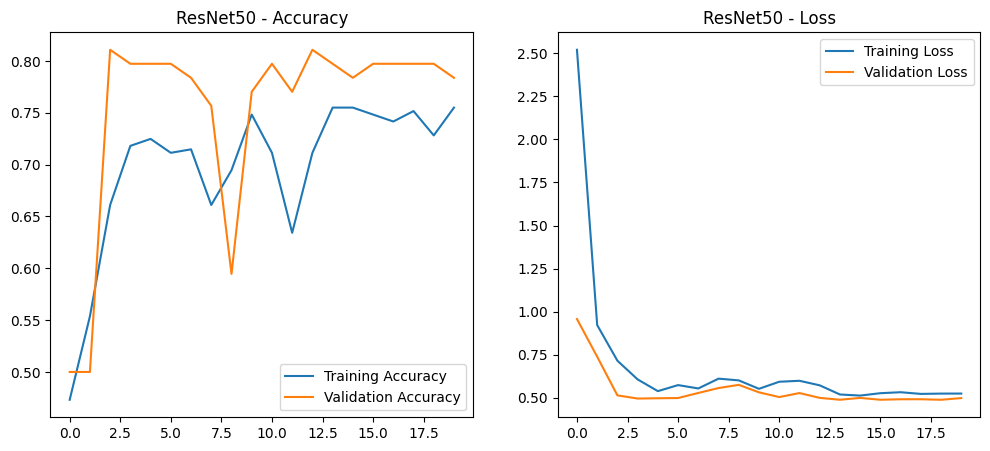

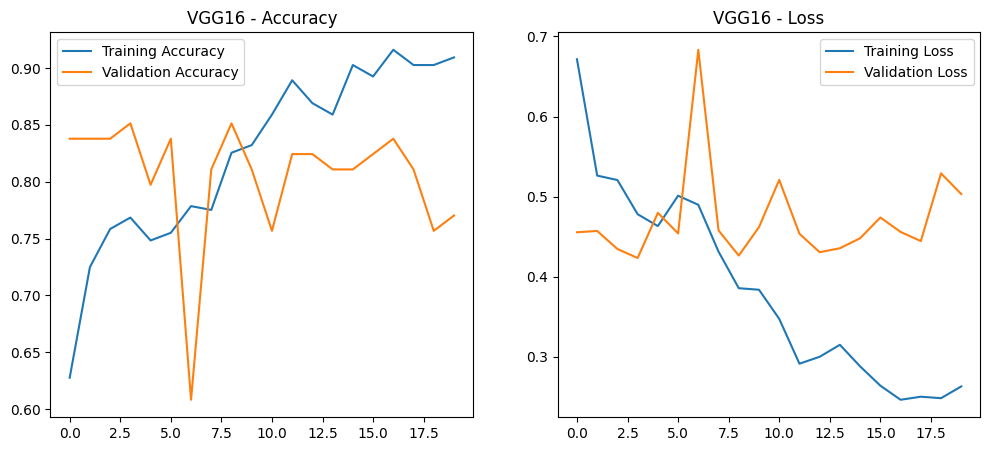

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{model_name} - Accuracy")
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{model_name} - Loss")
    plt.legend()

    plt.show()

# Plot ResNet
plot_history(history_resnet, "ResNet50")

# Plot VGG16
plot_history(history_vgg, "VGG16")
